In [1]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pandas as pd
import numpy as np
from time import time
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score , classification_report, mean_squared_error, r2_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import *
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [2]:

# Let's first load the data and take a look at what we have.
df = pd.read_csv('Heathrow_combined.csv')

In [3]:
df=df.dropna()

In [4]:
df

,Date,Nox_tropo,Nox_ground,tavg,tmin,tmax,prcp,wdir,wspd,pres
0,10/7/18,232.1240,59.746988,18.7,15.5,22.6,0.0,75.0,12.5,1023.9
1,11/7/18,168.0445,73.870523,18.6,13.9,23.4,0.0,45.0,10.1,1021.8
2,12/7/18,194.0030,59.394005,19.2,13.7,24.4,0.0,52.0,8.4,1021.5
3,13/7/18,343.2730,68.192323,20.6,15.7,26.8,0.0,135.0,10.1,1021.8
4,14/7/18,190.1570,78.645600,21.8,14.9,27.8,0.0,177.0,10.2,1020.0
...,...,...,...,...,...,...,...,...,...,...
772,6/1/21,85.2440,40.983786,3.2,0.1,5.6,0.5,89.0,11.3,1019.5
773,7/1/21,163.9400,37.200143,-0.1,-1.7,2.1,0.0,277.0,10.6,1018.6
774,9/1/21,282.0585,58.818259,0.1,-2.1,2.6,0.0,178.0,6.6,1026.4
775,16/1/21,147.2020,37.496792,4.8,-0.8,8.3,0.5,214.0,14.8,1020.0


In [5]:
df.drop(['Date'], 
               axis=1,
              inplace=True)


In [6]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

df=df
print(df.describe()) #to understand the dat

/Users/hridoy/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/hridoy/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/hridoy/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/hridoy/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework

        Nox_tropo  Nox_ground        tavg        tmin        tmax        prcp  \
count  581.000000  581.000000  581.000000  581.000000  581.000000  581.000000   
mean   154.640394   87.475530   11.952324    8.132702   15.979346    1.799312   
std     85.091413   53.594039    5.628182    5.180414    6.802516    3.711278   
min    -85.357000    7.343970   -0.300000   -5.200000    2.100000    0.000000   
25%     97.823000   53.771526    7.600000    4.300000   10.500000    0.000000   
50%    136.237500   76.813392   11.000000    7.500000   14.600000    0.000000   
75%    190.157000  107.551883   16.700000   12.100000   21.600000    1.800000   
max    643.546000  373.493696   28.600000   20.000000   37.200000   34.000000   

             wdir        wspd         pres  
count  581.000000  581.000000   581.000000  
mean   197.080895   15.085026  1015.459552  
std     69.440860    6.601353    11.312636  
min     16.000000    3.500000   977.500000  
25%    159.000000   10.100000  1008.800000  


In [7]:
df["Nox_tropo"]

0      232.1240
1      168.0445
2      194.0030
3      343.2730
4      190.1570
         ...   
772     85.2440
773    163.9400
774    282.0585
775    147.2020
776     74.6270
Name: Nox_tropo, Length: 581, dtype: float64

In [8]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

df=df
print(df.describe())

        Nox_tropo  Nox_ground        tavg        tmin        tmax        prcp  \
count  581.000000  581.000000  581.000000  581.000000  581.000000  581.000000   
mean   154.640394   87.475530   11.952324    8.132702   15.979346    1.799312   
std     85.091413   53.594039    5.628182    5.180414    6.802516    3.711278   
min    -85.357000    7.343970   -0.300000   -5.200000    2.100000    0.000000   
25%     97.823000   53.771526    7.600000    4.300000   10.500000    0.000000   
50%    136.237500   76.813392   11.000000    7.500000   14.600000    0.000000   
75%    190.157000  107.551883   16.700000   12.100000   21.600000    1.800000   
max    643.546000  373.493696   28.600000   20.000000   37.200000   34.000000   

             wdir        wspd         pres  
count  581.000000  581.000000   581.000000  
mean   197.080895   15.085026  1015.459552  
std     69.440860    6.601353    11.312636  
min     16.000000    3.500000   977.500000  
25%    159.000000   10.100000  1008.800000  


In [9]:
# X will be a pandas dataframe of all columns except meantempm
X = df[[col for col in df.columns if col != 'Nox_tropo']]

# y will be a pandas series of the meantempm
y = df['Nox_tropo']

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train  = y_train.astype(int)
y_test  = y_test.astype(int)
batch_size =len(X_train)

print(X_train.shape, y_train.shape,y_test.shape )

(464, 8) (464,) (117,)


In [11]:
## resclae
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Train
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
# test
X_test_scaled = scaler.fit_transform(X_test.astype(np.float64))

In [12]:
feature_columns = [tf.feature_column.numeric_column('x', shape=X_train_scaled.shape[1:])]	

In [13]:
feature_columns 

[NumericColumn(key='x', shape=(8,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [14]:
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
# load the dataset

# split into input (X) and output (y) variables
X = X
y = y
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X, y, epochs=150, batch_size=10)
# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

Instructions for updating:
Colocations handled automatically by placer.


Using TensorFlow backend.


Instructions for updating:
Use tf.cast instead.
Epoch 1/150
581/581 [==============================] - 0s 702us/step - loss: -2449.3942 - acc: 0.0000e+00
Epoch 2/150
581/581 [==============================] - 0s 208us/step - loss: -2449.3943 - acc: 0.0000e+00
Epoch 3/150
581/581 [==============================] - 0s 280us/step - loss: -2449.3943 - acc: 0.0000e+00
Epoch 4/150
581/581 [==============================] - 0s 244us/step - loss: -2449.3943 - acc: 0.0000e+00
Epoch 5/150
581/581 [==============================] - 0s 351us/step - loss: -2449.3943 - acc: 0.0000e+00
Epoch 6/150
581/581 [==============================] - 0s 244us/step - loss: -2449.3943 - acc: 0.0000e+00
Epoch 7/150
581/581 [==============================] - 0s 185us/step - loss: -2449.3943 - acc: 0.0000e+00
Epoch 8/150
581/581 [==============================] - 0s 198us/step - loss: -2449.3943 - acc: 0.0000e+00
Epoch 9/150
581/581 [==============================] - 0s 312us/step - loss: -2449.3942 - acc: 0.0000e+0

581/581 [==============================] - 0s 176us/step - loss: -2449.3942 - acc: 0.0000e+00
Epoch 75/150
581/581 [==============================] - 0s 170us/step - loss: -2449.3943 - acc: 0.0000e+00
Epoch 76/150
581/581 [==============================] - 0s 167us/step - loss: -2449.3943 - acc: 0.0000e+00
Epoch 77/150
581/581 [==============================] - 0s 167us/step - loss: -2449.3943 - acc: 0.0000e+00
Epoch 78/150
581/581 [==============================] - 0s 166us/step - loss: -2449.3943 - acc: 0.0000e+00
Epoch 79/150
581/581 [==============================] - 0s 136us/step - loss: -2449.3943 - acc: 0.0000e+00
Epoch 80/150
581/581 [==============================] - 0s 159us/step - loss: -2449.3942 - acc: 0.0000e+00
Epoch 81/150
581/581 [==============================] - 0s 133us/step - loss: -2449.3943 - acc: 0.0000e+00
Epoch 82/150
581/581 [==============================] - 0s 134us/step - loss: -2449.3943 - acc: 0.0000e+00
Epoch 83/150
581/581 [============================

581/581 [==============================] - 0s 117us/step
Accuracy: 0.00


In [15]:
X

,Nox_ground,tavg,tmin,tmax,prcp,wdir,wspd,pres
0,59.746988,18.7,15.5,22.6,0.0,75.0,12.5,1023.9
1,73.870523,18.6,13.9,23.4,0.0,45.0,10.1,1021.8
2,59.394005,19.2,13.7,24.4,0.0,52.0,8.4,1021.5
3,68.192323,20.6,15.7,26.8,0.0,135.0,10.1,1021.8
4,78.645600,21.8,14.9,27.8,0.0,177.0,10.2,1020.0
...,...,...,...,...,...,...,...,...
772,40.983786,3.2,0.1,5.6,0.5,89.0,11.3,1019.5
773,37.200143,-0.1,-1.7,2.1,0.0,277.0,10.6,1018.6
774,58.818259,0.1,-2.1,2.6,0.0,178.0,6.6,1026.4
775,37.496792,4.8,-0.8,8.3,0.5,214.0,14.8,1020.0


In [16]:
X

,Nox_ground,tavg,tmin,tmax,prcp,wdir,wspd,pres
0,59.746988,18.7,15.5,22.6,0.0,75.0,12.5,1023.9
1,73.870523,18.6,13.9,23.4,0.0,45.0,10.1,1021.8
2,59.394005,19.2,13.7,24.4,0.0,52.0,8.4,1021.5
3,68.192323,20.6,15.7,26.8,0.0,135.0,10.1,1021.8
4,78.645600,21.8,14.9,27.8,0.0,177.0,10.2,1020.0
...,...,...,...,...,...,...,...,...
772,40.983786,3.2,0.1,5.6,0.5,89.0,11.3,1019.5
773,37.200143,-0.1,-1.7,2.1,0.0,277.0,10.6,1018.6
774,58.818259,0.1,-2.1,2.6,0.0,178.0,6.6,1026.4
775,37.496792,4.8,-0.8,8.3,0.5,214.0,14.8,1020.0


In [17]:
X

,Nox_ground,tavg,tmin,tmax,prcp,wdir,wspd,pres
0,59.746988,18.7,15.5,22.6,0.0,75.0,12.5,1023.9
1,73.870523,18.6,13.9,23.4,0.0,45.0,10.1,1021.8
2,59.394005,19.2,13.7,24.4,0.0,52.0,8.4,1021.5
3,68.192323,20.6,15.7,26.8,0.0,135.0,10.1,1021.8
4,78.645600,21.8,14.9,27.8,0.0,177.0,10.2,1020.0
...,...,...,...,...,...,...,...,...
772,40.983786,3.2,0.1,5.6,0.5,89.0,11.3,1019.5
773,37.200143,-0.1,-1.7,2.1,0.0,277.0,10.6,1018.6
774,58.818259,0.1,-2.1,2.6,0.0,178.0,6.6,1026.4
775,37.496792,4.8,-0.8,8.3,0.5,214.0,14.8,1020.0


In [19]:
# example of training a final regression model
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler
# generate regression dataset



In [20]:
from sklearn.preprocessing import  MinMaxScaler
sc= MinMaxScaler()
X= sc.fit_transform(X)
y= y.values.reshape(-1,1)
y=sc.fit_transform(y)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [22]:
from keras import Sequential
from keras.layers import Dense
def build_regressor():
    regressor = Sequential()
    regressor.add(Dense(units=8, input_dim=8))
    regressor.add(Dense(units=1))
    regressor.compile(optimizer='adam', loss='mean_squared_error',  metrics=['mae','accuracy'])
    return regressor

In [23]:
from keras.wrappers.scikit_learn import KerasRegressor
regressor = KerasRegressor(build_fn=build_regressor, batch_size=32,epochs=100)

In [24]:
results=regressor.fit(X_train,y_train)

Epoch 1/100
406/406 [==============================] - 0s 535us/step - loss: 0.8122 - mean_absolute_error: 0.8745 - acc: 0.0000e+00
Epoch 2/100
406/406 [==============================] - 0s 103us/step - loss: 0.4445 - mean_absolute_error: 0.6311 - acc: 0.0025
Epoch 3/100
406/406 [==============================] - 0s 202us/step - loss: 0.2196 - mean_absolute_error: 0.4172 - acc: 0.0025
Epoch 4/100
406/406 [==============================] - 0s 70us/step - loss: 0.1091 - mean_absolute_error: 0.2619 - acc: 0.0025
Epoch 5/100
406/406 [==============================] - 0s 96us/step - loss: 0.0667 - mean_absolute_error: 0.1891 - acc: 0.0025
Epoch 6/100
406/406 [==============================] - 0s 55us/step - loss: 0.0541 - mean_absolute_error: 0.1776 - acc: 0.0025
Epoch 7/100
406/406 [==============================] - 0s 76us/step - loss: 0.0511 - mean_absolute_error: 0.1796 - acc: 0.0025
Epoch 8/100
406/406 [==============================] - 0s 60us/step - loss: 0.0491 - mean_absolute_error

406/406 [==============================] - 0s 61us/step - loss: 0.0112 - mean_absolute_error: 0.0730 - acc: 0.0025
Epoch 65/100
406/406 [==============================] - 0s 48us/step - loss: 0.0110 - mean_absolute_error: 0.0724 - acc: 0.0025
Epoch 66/100
406/406 [==============================] - 0s 61us/step - loss: 0.0110 - mean_absolute_error: 0.0724 - acc: 0.0025
Epoch 67/100
406/406 [==============================] - 0s 55us/step - loss: 0.0109 - mean_absolute_error: 0.0713 - acc: 0.0025
Epoch 68/100
406/406 [==============================] - 0s 63us/step - loss: 0.0108 - mean_absolute_error: 0.0713 - acc: 0.0025
Epoch 69/100
406/406 [==============================] - 0s 64us/step - loss: 0.0107 - mean_absolute_error: 0.0712 - acc: 0.0025
Epoch 70/100
406/406 [==============================] - 0s 61us/step - loss: 0.0107 - mean_absolute_error: 0.0707 - acc: 0.0025
Epoch 71/100
406/406 [==============================] - 0s 62us/step - loss: 0.0106 - mean_absolute_error: 0.0704 - a

In [25]:
y_pred= regressor.predict(X_test)

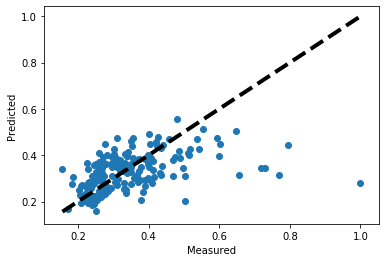

In [26]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [27]:
from sklearn.metrics import roc_auc_score , classification_report, mean_squared_error, r2_score

In [28]:
import math
from math import sqrt

In [29]:
rmse = sqrt(mean_squared_error(y_test, y_pred))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.117


In [30]:
rmse = sqrt(mean_squared_error(y_pred, y_test))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.117


In [31]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               1152      
_________________________________________________________________
dense_7 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_8 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_9 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 257       
Total params: 166,017
Trainable params: 166,017
Non-trainable params: 0
_________________________________________________________________


In [32]:

from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)


/Users/hridoy/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [33]:

checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [34]:
predictions = NN_model.predict(X_test)

In [35]:
predictions

array([[ 2.2658291e-03],
       [ 2.9294868e-04],
       [ 1.7781124e-03],
       [ 2.7008448e-03],
       [ 1.2501993e-03],
       [-1.3244732e-03],
       [ 4.8760585e-03],
       [ 1.0128574e-03],
       [ 8.5311476e-06],
       [ 2.5943320e-03],
       [-1.6499662e-03],
       [ 3.7841566e-03],
       [-2.3581547e-04],
       [ 1.2830445e-03],
       [ 4.4978235e-04],
       [ 1.6589141e-03],
       [-8.7097811e-05],
       [ 3.9160624e-03],
       [ 3.2433006e-03],
       [ 4.5861240e-04],
       [ 2.1932204e-03],
       [ 1.8585848e-03],
       [ 3.8763753e-03],
       [ 2.8671799e-03],
       [-2.3095077e-04],
       [ 2.4831546e-03],
       [ 4.5389570e-03],
       [ 2.0181295e-03],
       [ 1.4877302e-03],
       [ 1.0236857e-03],
       [ 2.2821864e-03],
       [ 2.6716909e-04],
       [ 3.7885942e-03],
       [-6.0284539e-04],
       [ 1.2437114e-03],
       [-8.9490728e-05],
       [-3.0357740e-04],
       [ 1.2071213e-03],
       [ 4.7295250e-04],
       [ 1.3401266e-03],


In [36]:
MAE = mean_absolute_error(y_test ,predictions)

In [37]:
MAE

0.3444722527141212